In [14]:
from pulp import *
import numpy as np

In [3]:
prob = LpProblem(name='LP-Sample', sense=LpMaximize)

In [4]:
x1 = LpVariable('x1', lowBound=0.0)
x2 = LpVariable('x2', lowBound=0.0)

In [5]:
prob += 2*x1 + 3*x2 #Objective function

In [6]:
prob += x1 + 3*x2 <= 9, 'ineq1'

In [7]:
prob += x1 + x2 <= 4, 'ineq2'

In [8]:
prob += 2*x1 + x2 <= 10, 'ineq3'

In [9]:
print(prob)

LP-Sample:
MAXIMIZE
2*x1 + 3*x2 + 0
SUBJECT TO
ineq1: x1 + 3 x2 <= 9

ineq2: x1 + x2 <= 4

ineq3: 2 x1 + x2 <= 10

VARIABLES
x1 Continuous
x2 Continuous



In [10]:
prob.solve()

1

In [11]:
print(LpStatus[prob.status])

Optimal


In [12]:
print('Optimal value = ', value(prob.objective))

Optimal value =  10.5


In [13]:
for v in prob.variables():
    print(v.name, '=', value(v))

x1 = 1.5
x2 = 2.5


### 一般的な線形最適化問題

In [19]:
A = np.array([[3,1,2], [1,3,0], [0,2,4]]) #coefficient matrix
c = np.array([150, 200, 300]) # cost/objective vector
b = np.array([60, 36, 48])
(m,n) = A.shape
prob = LpProblem(name='Production', sense=LpMaximize)
x = [LpVariable('x'+str(i+1), lowBound=0) for i in range(n)]
prob += lpDot(c,x)  # objective function
for i in range(m):
    prob += lpDot(A[i],x) <= b[i], 'ineq'+str(i)
print(prob)

Production:
MAXIMIZE
150*x1 + 200*x2 + 300*x3 + 0
SUBJECT TO
ineq0: 3 x1 + x2 + 2 x3 <= 60

ineq1: x1 + 3 x2 <= 36

ineq2: 2 x2 + 4 x3 <= 48

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous



In [20]:
prob.solve()
print(LpStatus[prob.status])
print('Optimal value = ', value(prob.objective))
for v in prob.variables():
    print(v.name, '=', value(v))

Optimal
Optimal value =  5800.0
x1 = 12.0
x2 = 8.0
x3 = 8.0


#### 最適化について
##### 停留点、極小点

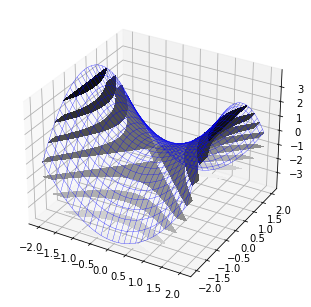

In [13]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

x = y = np.linspace(-2,2)
x, y = np.meshgrid(x, y)

g1 = lambda x: x[0]**2 - x[1]**2
ax = Axes3D(plt.figure())
ax.plot_wireframe(x,y,g1([x,y]), rstride=2, cstride=2, color='blue',linewidth=0.3)
plt.contourf(x,y,g1([x,y]), cmap=plt.cm.binary)

plt.show()